In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.models import Model
from keras.layers import Input, Dense
from keras.datasets import mnist
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [18]:
#loading the mnist dataset
(x_train, _),(x_test, _) = mnist.load_data()

#Normalizing
x_train = x_train.astype('float32') / 255.
x_test =  x_test.astype('float32') /255.

print(x_train.shape)
print(x_test.shape)

#reshape
x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)



(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [20]:
#autoancoder architecture
input_img = Input(shape=(784,))
encode = Dense(128 ,activation='sigmoid')(input_img)
decode = Dense(784 ,activation='sigmoid')(encode)

#build model
autoencoder = Model(input_img,decode)
encoded = Model(input_img,encode)
#compile model
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

#train model
autoencoder.fit(x_train , x_train,
               epochs = 5,
               batch_size=256,
               shuffle=True,
               validation_data = (x_test , x_test))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3467 - val_loss: 0.2327
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2221 - val_loss: 0.1933
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1875 - val_loss: 0.1684
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1647 - val_loss: 0.1501
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1475 - val_loss: 0.1366


In [22]:
encoded_img = encoded.predict(x_test)
decoded_img = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step


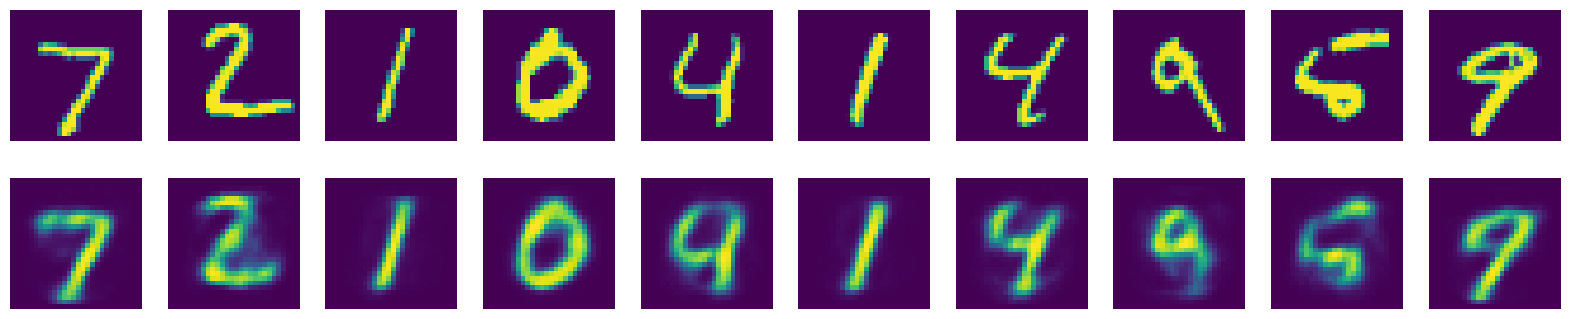

In [24]:

n=10
plt.figure(figsize=(20,4))
for i in range(n):
    #orignal
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.axis('off')

    #decoded
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_img[i].reshape(28,28))
    plt.axis('off')
plt.show()

In [26]:
#sparse_encoder
from keras import regularizers

imput_img = Input(shape=(784,))
encoded = Dense(128,activation='sigmoid',activity_regularizer = regularizers.l1(10e-5))(input_img)
decoded = Dense(784,activation='sigmoid')(encoded)

#model
sparse_encoder = Model(input_img,decoded)

#compile 
sparse_encoder.compile(optimizer='adam',loss='binary_crossentropy')

sparse_encoder.fit(x_train,x_train,
                  epochs=5,
                  batch_size=5,
                  shuffle=True,
                  validation_data = (x_test,x_test))

Epoch 1/5
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 0.1759 - val_loss: 0.1014
Epoch 2/5
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 0.0992 - val_loss: 0.0926
Epoch 3/5
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 0.0919 - val_loss: 0.0889
Epoch 4/5
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 0.0886 - val_loss: 0.0870
Epoch 5/5
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 0.0865 - val_loss: 0.0854


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step


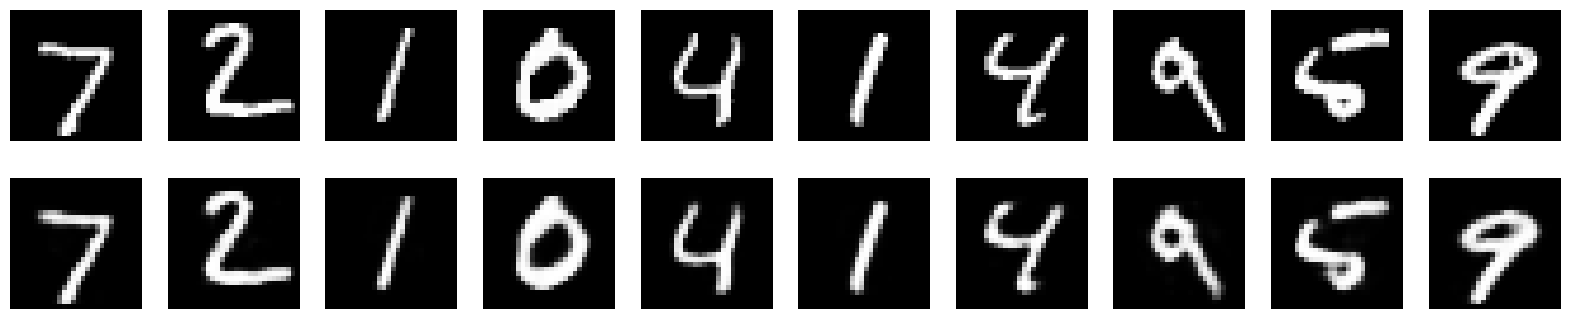

In [28]:
sparse_imgs = sparse_encoder.predict(x_test)

n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.axis('off')
    plt.gray()

    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(sparse_imgs[i].reshape(28,28))
    plt.axis('off')

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3187 - val_loss: 0.1659
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1583 - val_loss: 0.1389
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1368 - val_loss: 0.1279
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1268 - val_loss: 0.1220
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1218 - val_loss: 0.1185
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step


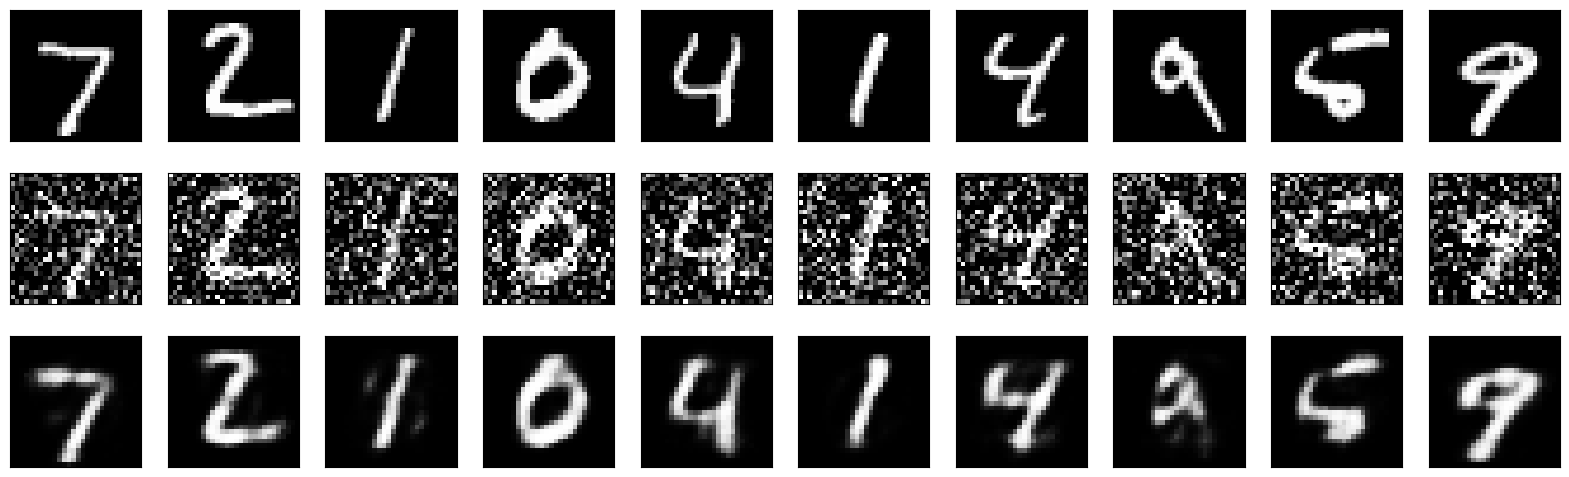

In [30]:
#denoising_autoencoder
# Adding noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Denoising Autoencoder
ip_img = Input(shape=(784,))
encoded = Dense(128,activation='relu')(ip_img)
decoded = Dense(784,activation='sigmoid')(encoded)

# Build model
denoising_autoencoder = Model(ip_img,decoded)

# Compile
denoising_autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

# Train
denoising_autoencoder.fit(x_train_noisy,x_train,epochs=5,batch_size=256,shuffle=True,validation_data=(x_test_noisy,x_test))

# Encoding and decoding
recon_imgs = denoising_autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20,6))
for i in range(n):
  # Display original
  ax = plt.subplot(3, n, i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Display original
  ax = plt.subplot(3, n, i+1+n)
  plt.imshow(x_test_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Display reconstruction
  ax = plt.subplot(3, n, i+1+2*n)
  plt.imshow(recon_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()